In [ ]:
!pip install pandas
!pip install beautifulsoup4
!pip install requests
!pip install geopandas

In [157]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from IPython.display import display

url = 'https://en.wikipedia.org/wiki/List_of_Indonesian_provinces_by_GDP'

response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', {'class': 'wikitable'})
    df = pd.read_html(str(table))[0]
    df = df.iloc[1:]
    display(df)

,Rank,Province,Region,GDP[8] (in billion Rp),GDP Nominal,GDP PPP
,Rank,Province,Region,GDP[8] (in billion Rp),(in billion $),(in billion $)
1,-,Java Island,Indonesia,10813999,728.27,2272.54
2,-,Sumatra Island,Indonesia,4220203,284.21,886.87
3,1,Jakarta,Java,3186470,214.59,669.63
4,2,East Java,Java,2730907,183.91,573.89
5,3,West Java,Java,2422782,163.16,509.14
6,-,Kalimantan,Indonesia,1767053,119.00,371.34
7,4,Central Java,Java,1560899,105.12,328.02
8,-,Sulawesi Island,Indonesia,1168122,81.64,245.72
9,5,Riau,Sumatra,991589,66.78,208.38


In [158]:
df['Rank'] = df['Rank'].replace('-', pd.NaT)
df = df.dropna(subset=[('Rank','Rank'),('Province','Province'),('Region','Region'),
 ('GDP[8] (in billion Rp)', 'GDP[8] (in billion Rp)'),
  ('GDP Nominal','(in billion $)'),('GDP PPP','(in billion $)')])
display (df)

,Rank,Province,Region,GDP[8] (in billion Rp),GDP Nominal,GDP PPP
,Rank,Province,Region,GDP[8] (in billion Rp),(in billion $),(in billion $)
3,1,Jakarta,Java,3186470,214.59,669.63
4,2,East Java,Java,2730907,183.91,573.89
5,3,West Java,Java,2422782,163.16,509.14
7,4,Central Java,Java,1560899,105.12,328.02
9,5,Riau,Sumatra,991589,66.78,208.38
10,6,North Sumatra,Sumatra,955193,64.33,200.73
11,7,East Kalimantan,Kalimantan,921332,62.05,193.62
12,8,Banten,Java,747250,50.32,157.03
13,9,South Sulawesi,Sulawesi,605145,40.75,124.32


In [142]:
df.columns = df.columns.map('_'.join)
df.columns = ['Rank', 'Province', 'Region', 'GDP_in_Billion_Rp', 'GDP_in_Billion_Usd', 'GDP_PPP_in_Billion_Usd']
display(df)

,Rank,Province,Region,GDP_in_Billion_Rp,GDP_in_Billion_Usd,GDP_PPP_in_Billion_Usd
3,1,Jakarta,Java,3186470,214.59,669.63
4,2,East Java,Java,2730907,183.91,573.89
5,3,West Java,Java,2422782,163.16,509.14
7,4,Central Java,Java,1560899,105.12,328.02
9,5,Riau,Sumatra,991589,66.78,208.38
10,6,North Sumatra,Sumatra,955193,64.33,200.73
11,7,East Kalimantan,Kalimantan,921332,62.05,193.62
12,8,Banten,Java,747250,50.32,157.03
13,9,South Sulawesi,Sulawesi,605145,40.75,124.32
14,10,South Sumatra,Sumatra,591603,39.84,124.32


In [187]:
#From Opencage
api_key = '6259df63f58e439aaedce7a13875399e'

def get_lat_long_from_opencage(api_key, location):
    base_url = 'https://api.opencagedata.com/geocode/v1/json'
    params = {
        'q': location,
        'key': api_key
    }

    response = requests.get(base_url, params=params)
    data = response.json()

    if response.status_code == 200 and data['results']:
        result = data['results'][0]['geometry']
        latitude = result['lat']
        longitude = result['lng']
        return latitude, longitude
    else:
        print(f"Failed to retrieve data for {location}")
        return None, None

df['Latitude'], df['Longitude'] = zip(*df['Province'].apply(lambda x: get_lat_long_from_opencage(api_key, x)))

selected_columns_df = df[['Province', 'Latitude', 'Longitude']]
display(selected_columns_df)

,Province,Latitude,Longitude
3,Jakarta,-6.175247,106.827049
4,East Java,-7.697740,112.491420
5,West Java,-6.889190,107.640472
7,Central Java,-7.303241,110.004414
9,Riau,0.500411,101.547581
10,North Sumatra,2.192352,99.381220
11,East Kalimantan,0.788440,116.241998
12,Banten,-6.445380,106.137559
13,South Sulawesi,-3.644672,119.947191
14,South Sumatra,-3.126684,104.093055


In [188]:
display(df)

,Rank,Province,Region,GDP_in_Billion_Rp,GDP_in_Billion_Usd,GDP_PPP_in_Billion_Usd,Latitude,Longitude
3,1,Jakarta,Java,3186470,214.59,669.63,-6.175247,106.827049
4,2,East Java,Java,2730907,183.91,573.89,-7.697740,112.491420
5,3,West Java,Java,2422782,163.16,509.14,-6.889190,107.640472
7,4,Central Java,Java,1560899,105.12,328.02,-7.303241,110.004414
9,5,Riau,Sumatra,991589,66.78,208.38,0.500411,101.547581
10,6,North Sumatra,Sumatra,955193,64.33,200.73,2.192352,99.381220
11,7,East Kalimantan,Kalimantan,921332,62.05,193.62,0.788440,116.241998
12,8,Banten,Java,747250,50.32,157.03,-6.445380,106.137559
13,9,South Sulawesi,Sulawesi,605145,40.75,124.32,-3.644672,119.947191
14,10,South Sumatra,Sumatra,591603,39.84,124.32,-3.126684,104.093055


In [196]:
#Membersihkan dan mengetahui tipe kolom
df.columns = df.columns.str.replace('R a n k R a n k', 'Rank')
df.columns = df.columns.str.replace('P r o v i n c e P r o v i n c e', 'Province')
df.columns = df.columns.str.replace('R e g i o n R e g i o n', 'Region')
df.columns = df.columns.str.replace('G D P 8 in billion R p G D P 8 in billion R p', 'GDP_in_Billion_Rp')
df.columns = df.columns.str.replace('G D P N o m i n a l in billion', 'GDP_in_Billion_Usd')
df.columns = df.columns.str.replace('G D P P P P in billion', 'GDP_PPP_in_Billion_Usd')
df.columns = df.columns.str.replace('Latitude', 'Latitude')
df.columns = df.columns.str.replace('Longitude', 'Longitude')

print(df.dtypes)

Rank                        int64
Province                   object
Region                     object
GDP_in_Billion_Rp           int64
GDP_in_Billion_Usd        float64
GDP_PPP_in_Billion_Usd    float64
Latitude                  float64
Longitude                 float64
dtype: object


In [197]:
# Menggabungkan lat dan long menjadi satu kolom "Lat_Long"
df['Lat_Long'] = df['Latitude'].astype(str) + ', ' + df['Longitude'].astype(str)
display(df)

,Rank,Province,Region,GDP_in_Billion_Rp,GDP_in_Billion_Usd,GDP_PPP_in_Billion_Usd,Latitude,Longitude,Lat_Long
3,1,Jakarta,Java,3186470,214.59,669.63,-6.175247,106.827049,"-6.175247, 106.8270488"
4,2,East Java,Java,2730907,183.91,573.89,-7.697740,112.491420,"-7.6977397, 112.4914199"
5,3,West Java,Java,2422782,163.16,509.14,-6.889190,107.640472,"-6.8891904, 107.6404716"
7,4,Central Java,Java,1560899,105.12,328.02,-7.303241,110.004414,"-7.3032412, 110.0044145"
9,5,Riau,Sumatra,991589,66.78,208.38,0.500411,101.547581,"0.5004112, 101.5475811"
10,6,North Sumatra,Sumatra,955193,64.33,200.73,2.192352,99.381220,"2.1923519, 99.3812201"
11,7,East Kalimantan,Kalimantan,921332,62.05,193.62,0.788440,116.241998,"0.7884397, 116.2419977"
12,8,Banten,Java,747250,50.32,157.03,-6.445380,106.137559,"-6.4453801, 106.1375586"
13,9,South Sulawesi,Sulawesi,605145,40.75,124.32,-3.644672,119.947191,"-3.6446718, 119.9471906"
14,10,South Sumatra,Sumatra,591603,39.84,124.32,-3.126684,104.093055,"-3.1266842, 104.0930554"


<ipython-input-200-db789be455fe>:13: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



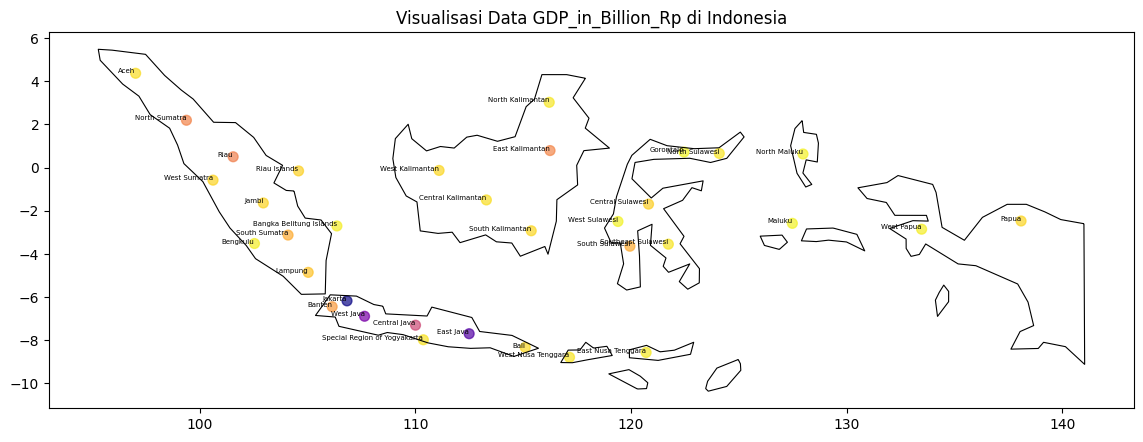

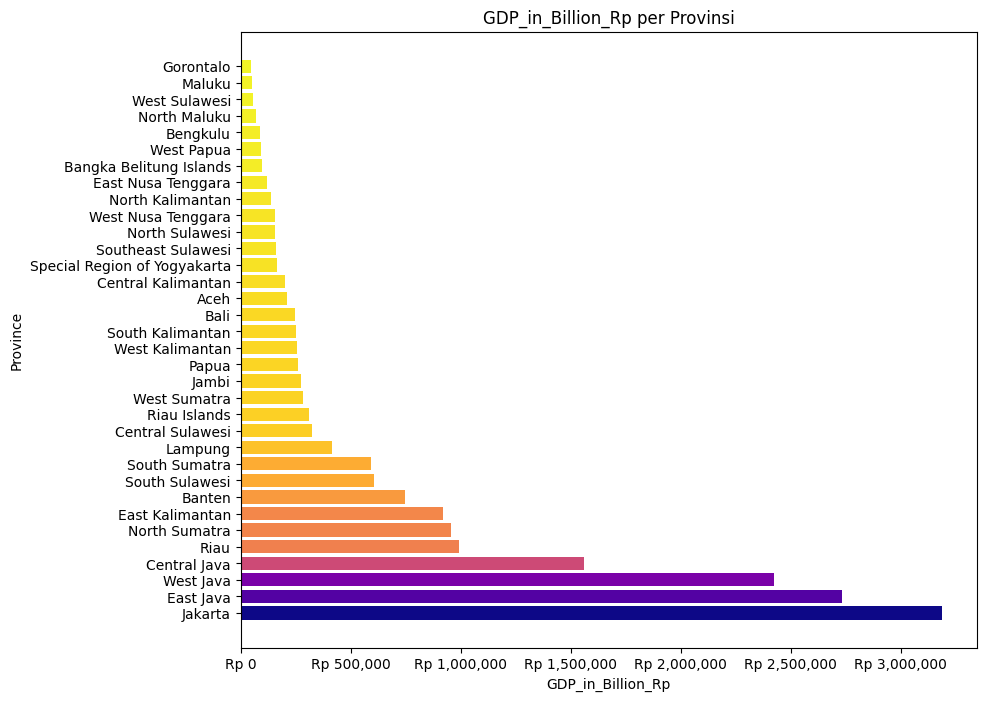

In [200]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.ticker as ticker

#Geometri titik berdasarkan Longitude dan Latitude
geometry = [Point(lon, lat) for lon, lat in zip(df['Longitude'], df['Latitude'])]

#GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

#Peta dari geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Map Indonesia
indonesia = world[world['name'] == 'Indonesia']

#Ukuran Peta
fig, ax1 = plt.subplots(figsize=(14, 8))

#Pengaturan intensitas warna titik di peta berdasarkan GDP
cax = gdf.plot(ax=ax1, color=plt.cm.plasma_r(gdf['GDP_in_Billion_Rp'] / gdf['GDP_in_Billion_Rp'].max()), markersize=50, alpha=0.7, legend=True)

#Menampilkan nama provinsi
for idx, row in gdf.iterrows():
    ax1.text(row['geometry'].x, row['geometry'].y, row['Province'], fontsize=5, ha='right')

#Judul
ax1.set_title('Visualisasi Data GDP_in_Billion_Rp di Indonesia')

#Menambahkan map indonesia
indonesia.boundary.plot(ax=ax1, linewidth=0.8, color='black')

plt.show()

#Ukuran kotak bar chart
fig, ax2 = plt.subplots(figsize=(9.5, 8))

#Pengaturan intensitas warna bar chart berdasarkan GDP
ax2.barh(gdf['Province'], gdf['GDP_in_Billion_Rp'], color=plt.cm.plasma_r(gdf['GDP_in_Billion_Rp'] / gdf['GDP_in_Billion_Rp'].max()))

#Keterangan tampilan bar chart
ax2.set_title('GDP_in_Billion_Rp per Provinsi')
ax2.set_xlabel('GDP_in_Billion_Rp')
ax2.set_ylabel('Province')

#Format Rupiah
formatter = ticker.StrMethodFormatter("Rp {x:,.0f}")
ax2.xaxis.set_major_formatter(formatter)

plt.show()